In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
mydata=pd.read_excel(r'C:\Users\chris\Desktop\Georgian\Data Programming\Assignment\3-Presentation\AppleStore.xls')
mydata['app_type']= np.where(mydata.price==0.00,'Free','Paid')
mydata.head()



,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_type
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,Paid
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Free
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Free
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,Free
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Free


In [3]:
#drop column (Unnamed)
mydata.drop(['Unnamed: 0'], axis=1 ,inplace=True)
mydata.head(2)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_type
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,Paid
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Free


In [4]:
mydata.shape

(7197, 17)

In [5]:
mydata.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
app_type            0
dtype: int64

In [6]:
# Top 10 Categories and number of apps in each category
new_data_cate = mydata.groupby([mydata.prime_genre])[['id']].count().reset_index().sort_values('id' ,ascending = False)
new_data_cate.columns = ['prime_genre','No. of Apps']
new_data_cate.head(10)


,prime_genre,No. of Apps
7,Games,3862
4,Entertainment,535
3,Education,453
14,Photo & Video,349
21,Utilities,248
8,Health & Fitness,180
15,Productivity,178
18,Social Networking,167
9,Lifestyle,144
11,Music,138


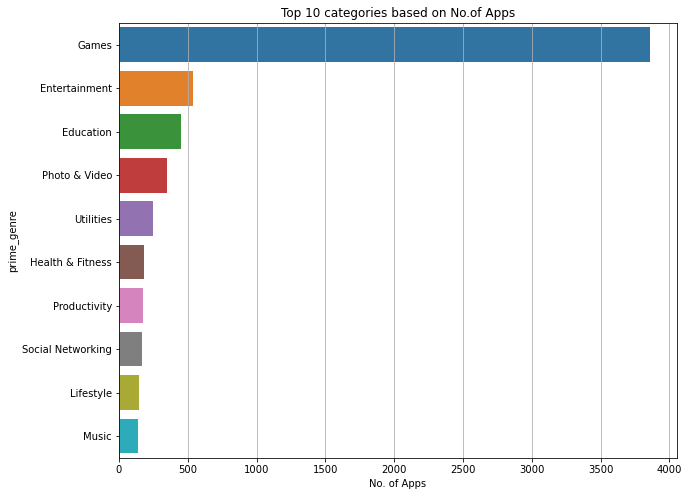

In [7]:
plt.figure(figsize=(10,8))
sns.barplot(y = 'prime_genre',x = 'No. of Apps', data=new_data_cate.head(10))
plt.title('Top 10 categories based on No.of Apps')
plt.grid(axis='x')

Text(0.5, 1.0, 'Count of Free & Paid Apps')

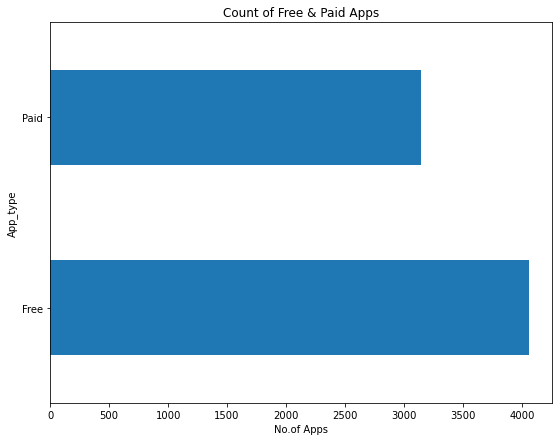

In [8]:
#No.of Paid Apps vs Free Apps
plt.figure(figsize=(9,7))
ax=mydata['app_type'].value_counts().plot(kind='barh' )
plt.xlabel('No.of Apps')
plt.ylabel('App_type')
plt.title('Count of Free & Paid Apps')

Text(0.5, 1.0, 'Free vs Paid Apps')

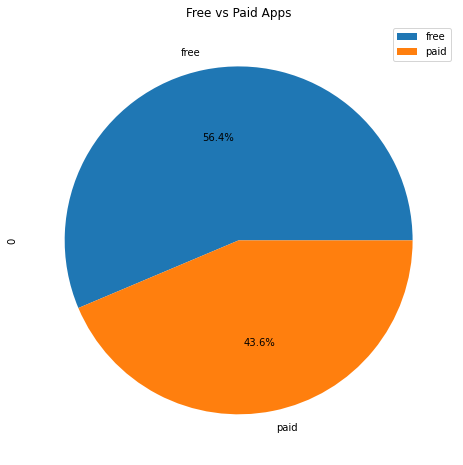

In [9]:
free_apps = mydata[(mydata.price==0.00)]
paid_apps  = mydata[(mydata.price>0)]
app_pricetype= pd.DataFrame( [len(free_apps),len(paid_apps)] , index=['free','paid'])
app_pricetype.plot(kind='pie',subplots=True, figsize=(16,8), autopct='%1.1f%%')
plt.title('Free vs Paid Apps')
#Top_Apps=paid_apps.sort_values('price',ascending=False)[paid_apps.price>50][['track_name','price','prime_genre','user_rating']]
#Top_Apps




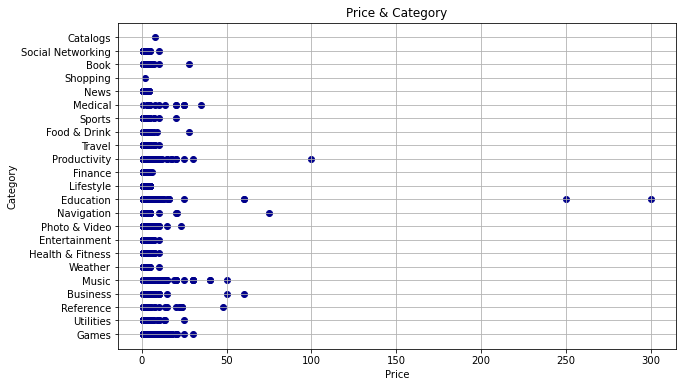

In [10]:
#Distribution of price over the prime_genre
plt.figure(figsize=(10,6))
plt.scatter(y=paid_apps.prime_genre ,x=paid_apps.price,c='DarkBlue')
plt.title('Price & Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Frequency of User ratings')

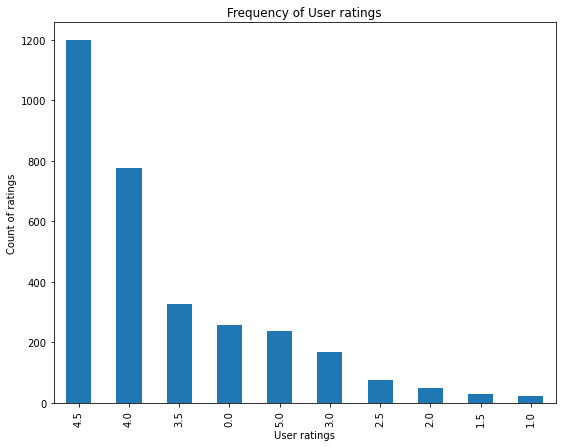

In [11]:
plt.figure(figsize=(9,7))
ax=paid_apps['user_rating'].value_counts().plot(kind='bar')
plt.xlabel('User ratings')
plt.ylabel('Count of ratings')
plt.title('Frequency of User ratings')

In [12]:
#Count of user_ratings for Priced apps
new_data_cate2 = paid_apps.groupby([paid_apps.user_rating])[['id']].count().reset_index().sort_values('id' ,ascending = False)
new_data_cate2.columns = ['user_rating','Frequency of user_rating']
new_data_cate2.head(10)

,user_rating,Frequency of user_rating
8,4.5,1198
7,4.0,776
6,3.5,328
0,0.0,256
9,5.0,237
5,3.0,167
4,2.5,77
3,2.0,49
2,1.5,30
1,1.0,23


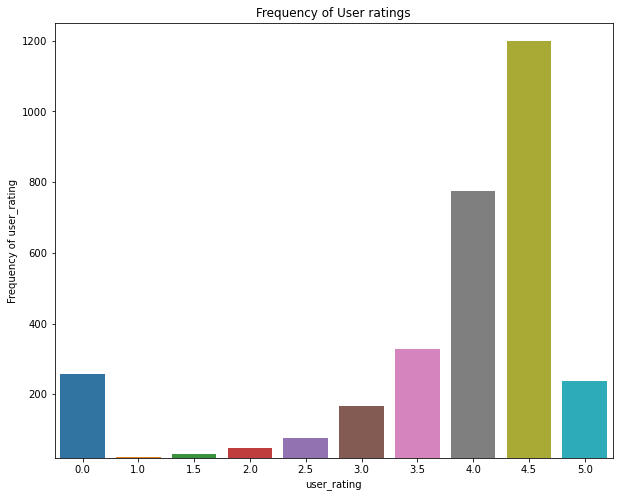

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(y = 'Frequency of user_rating',x = 'user_rating', data=new_data_cate2)
plt.ylim(20, 1250)
plt.title('Frequency of User ratings')
plt.show()

In [14]:
popular_paid_apps = paid_apps.sort_values(['user_rating','rating_count_tot'], ascending=False)
ratingapp = popular_paid_apps[(popular_paid_apps['user_rating'] == 4.0) | (popular_paid_apps['user_rating'] == 5.0) | (popular_paid_apps['user_rating']==4.5)]

C:\Users\chris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Plants vs. Zombies---Games'),
 Text(1, 0, 'Infinity Blade---Games'),
 Text(2, 0, 'Geometry Dash---Games'),
 Text(3, 0, 'Plants vs. Zombies HD---Games'),
 Text(4, 0, 'The Room---Games'),
 Text(5, 0, 'HB2 PLUS---Games'),
 Text(6, 0, 'Ski Safari---Games'),
 Text(7, 0, 'The Room Two---Games'),
 Text(8, 0, 'Yoga Studio---Health & Fitness')]

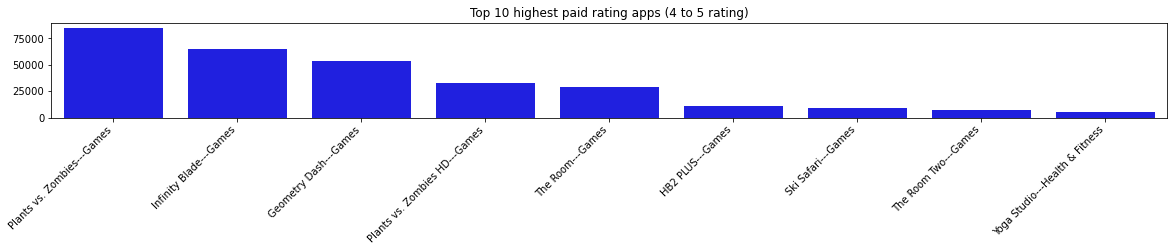

In [15]:
#Top 10 highest paid rating apps
fig = plt.figure(figsize=(20,8))
plt.subplot(414)
plt.title("Top 10 highest paid rating apps (4 to 5 rating)")
ax = sns.barplot(ratingapp['track_name'][0:9] + '---' + ratingapp['prime_genre'][0:9],(ratingapp['rating_count_tot']/ratingapp['user_rating'])[0:9], color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

(0.0, 4227238656.0)

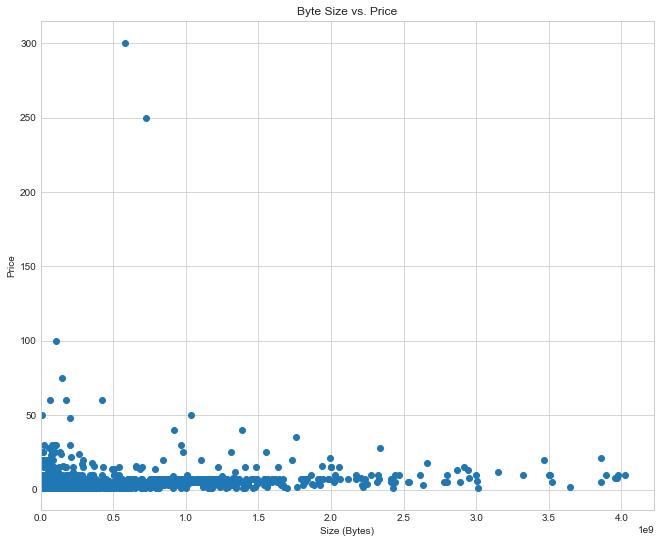

In [16]:
#Does size influence the price of app
plt.figure(figsize=(11,9))
plt.style.use('seaborn-whitegrid')
plt.scatter(paid_apps['size_bytes'],paid_apps['price'])
plt.title('Byte Size vs. Price')
plt.xlabel('Size (Bytes)')
plt.ylabel('Price')
plt.xlim(0)

In [17]:
Correlation=mydata.corr()
Correlation.style.background_gradient()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,1.000000,0.077486,-0.075247,-0.201976,-0.072784,-0.185178,-0.109849,0.033605,0.052082,-0.128932,0.017743
size_bytes,0.077486,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614,-0.150418
price,-0.075247,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713,-0.029942
rating_count_tot,-0.201976,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675,-0.000982
rating_count_ver,-0.072784,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287,0.006460
user_rating,-0.185178,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976,0.069816
user_rating_ver,-0.109849,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580,0.050094
sup_devices.num,0.033605,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681,-0.037109
ipadSc_urls.num,0.052082,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378,0.071901
lang.num,-0.128932,0.004614,-0.006713,0.137675,0.013287,0.170976,0.175580,-0.041681,0.088378,1.000000,0.032477
